In [1]:
import urllib
    
import torch
from PIL import Image
from torchvision import transforms

import torchtrail

/Users/arakhmati/github/torchtrail/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using cache found in /Users/arakhmati/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/arakhmati/github/torchtrail/env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/arakhmati/github/torchtrail/env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


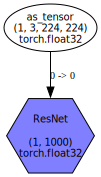

In [2]:
model = torch.hub.load("pytorch/vision:v0.10.0", "resnet18", pretrained=True).eval()

url = "https://github.com/pytorch/hub/raw/master/images/dog.jpg"
filename = "/tmp/dog.jpg"

try:
    urllib.URLopener().retrieve(url, filename)
except:
    urllib.request.urlretrieve(url, filename)

input_image = Image.open(filename)
preprocess = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)
input_tensor = preprocess(input_image).unsqueeze(0)

with torchtrail.trace():
    input_tensor = torch.as_tensor(input_tensor)
    output = model(input_tensor)

probabilities = torch.nn.functional.softmax(output[0], dim=0)

torchtrail.visualize(output, max_depth=1)

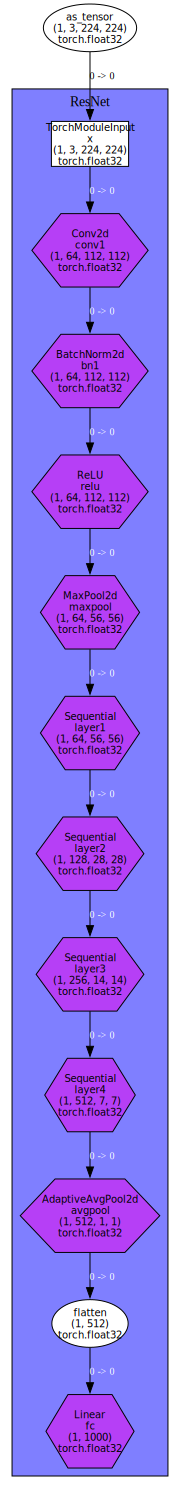

In [3]:
torchtrail.visualize(output, max_depth=2)

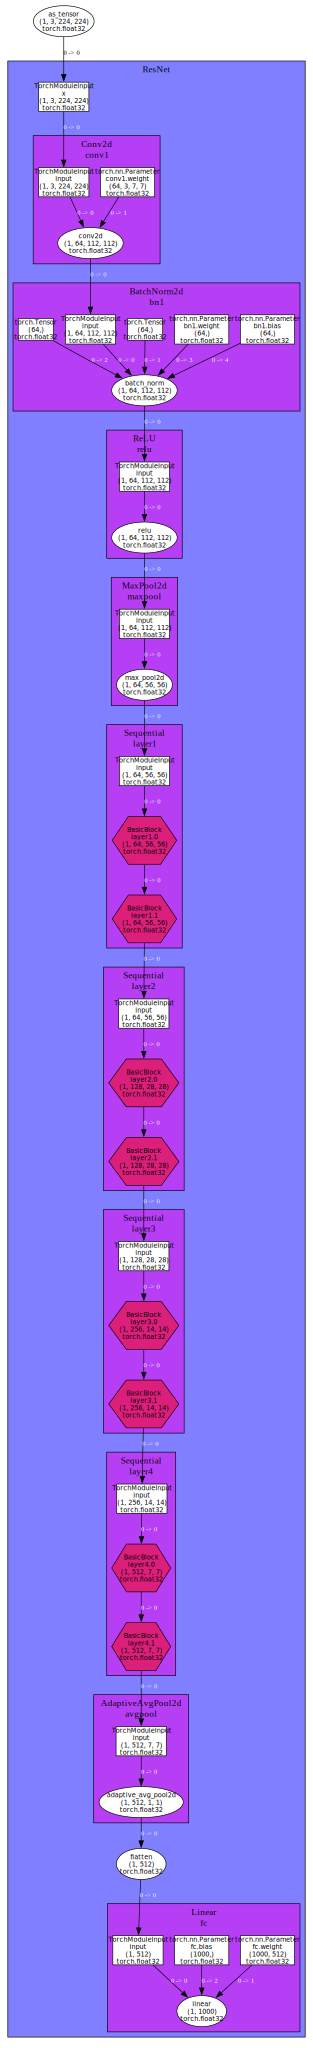

In [4]:
torchtrail.visualize(output, max_depth=3)

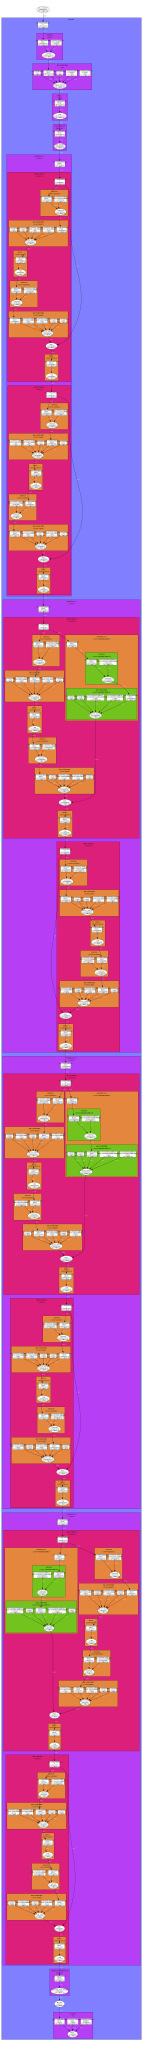

In [5]:
torchtrail.visualize(output)

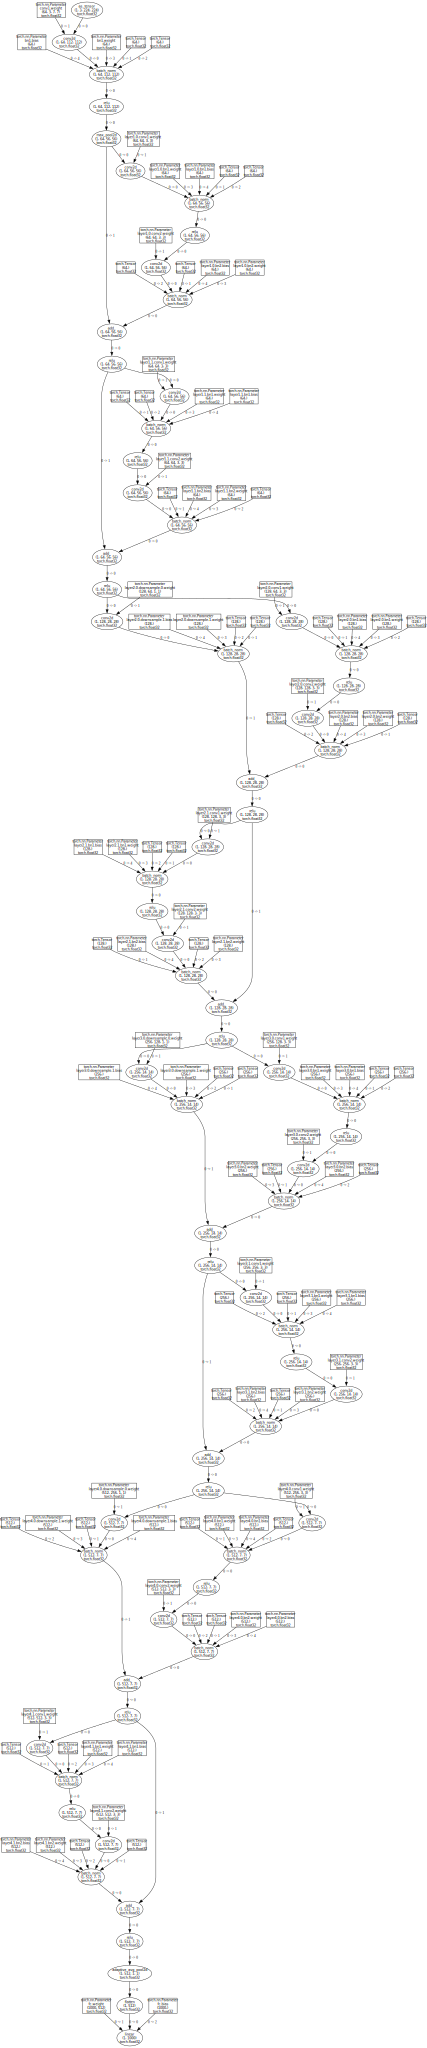

In [6]:
torchtrail.visualize(output, show_modules=False)